# Iris Dataset which is the classification problem Prepare a model using the logistic Regression

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
##Drop the id column because it does not affect the Output feature much

df=df.drop(labels=['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
##Check the missing values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Observation: There is no missing value

In [7]:
##Since the output feature is categorisede into three different categories so,it is multiclass classification
#I will convert it into binaryclass classification and then train the model

In [9]:
df=df[df['Species']!='Iris-setosa']                             ##Drop the Iris-setosa column

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [11]:
##Now check the duplicates values are present or not

df.duplicated().sum()

1

In [12]:
df.drop_duplicates(keep='first',inplace=True)           ##Drop the duplicates values

C:\Users\nikit\AppData\Local\Temp\ipykernel_25860\1708699536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first',inplace=True)           ##Drop the duplicates values


In [13]:
df.duplicated().sum()                      ##Now,no duplicates are present

0

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 50 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  99 non-null     float64
 1   SepalWidthCm   99 non-null     float64
 2   PetalLengthCm  99 non-null     float64
 3   PetalWidthCm   99 non-null     float64
 4   Species        99 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 4.6 KB


In [41]:
##Feature selection

##Correlation
import matplotlib.pyplot as plt
%matplotlib inline

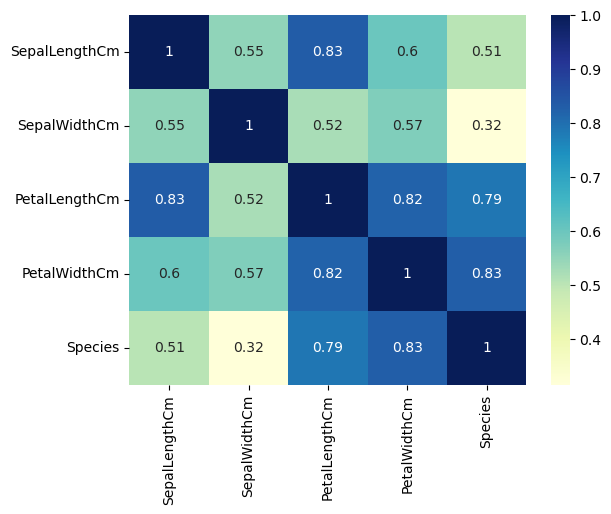

In [42]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [15]:
##Handle the categorical output feature and use the mapping to convert it into numeric value i.e 0 and 1

df['Species']=df['Species'].map({'Iris-versicolor':0,'Iris-virginica':1})

C:\Users\nikit\AppData\Local\Temp\ipykernel_25860\1214669943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species']=df['Species'].map({'Iris-versicolor':0,'Iris-virginica':1})


In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


<Axes: >

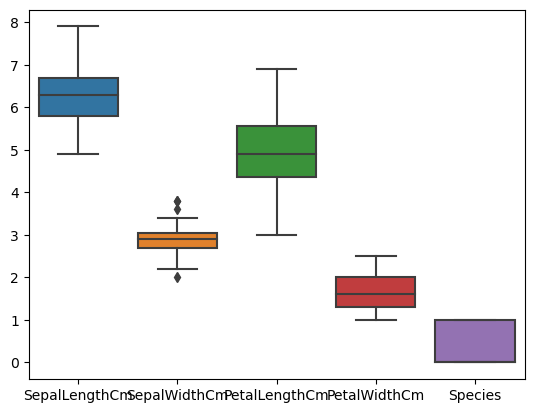

In [61]:
##Checking the outliers present

sns.boxplot(df)

In [62]:
numerical_columns=df.columns[df.dtypes!='object']

In [63]:
numerical_columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

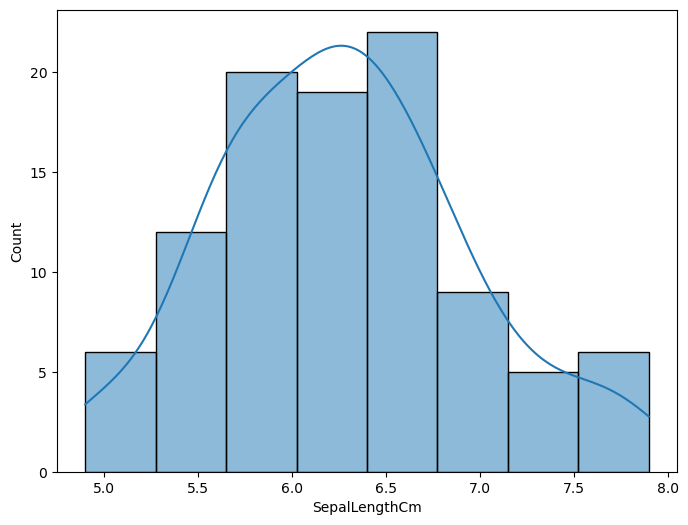

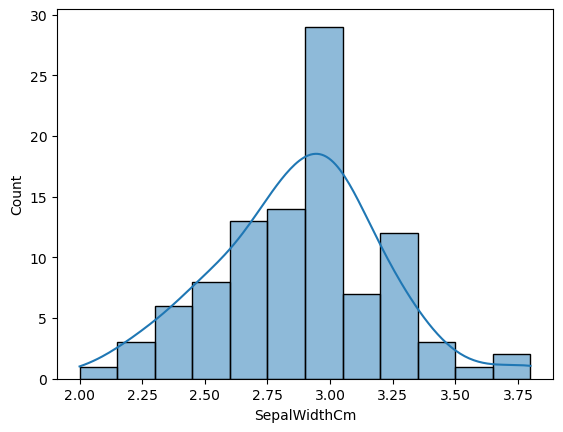

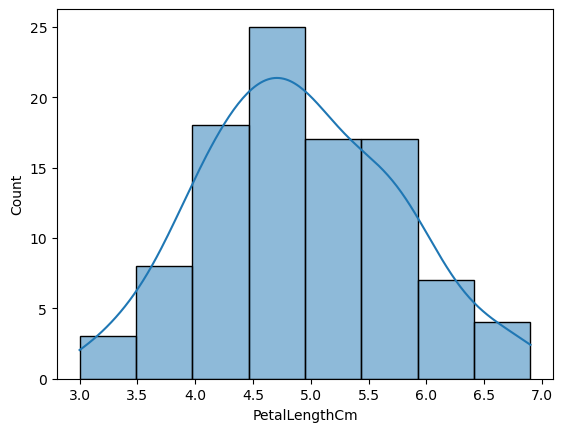

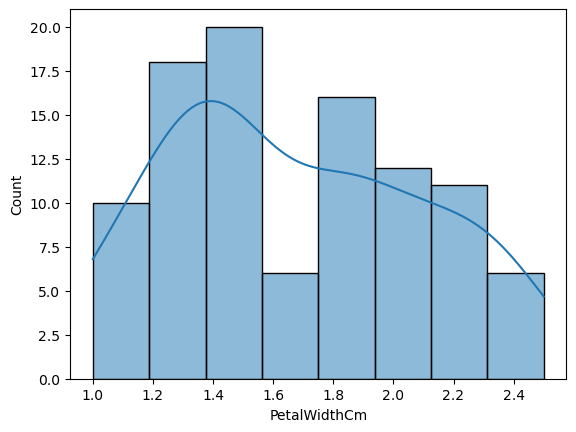

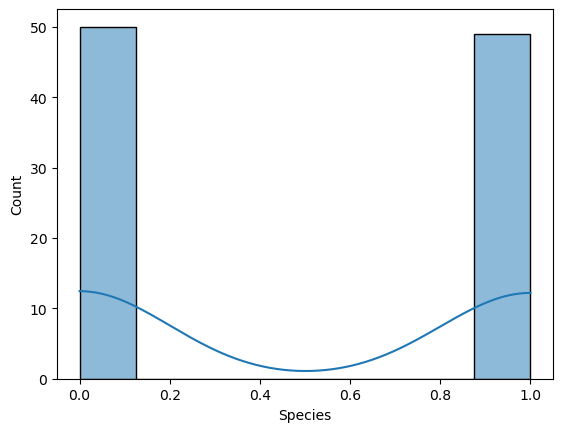

In [64]:
##Analyse the histogram plot of each numerical columns present there

plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [17]:
## Independent and dependent features
X = df.drop(labels=['Species'],axis=1)
Y = df[['Species']]

In [18]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [19]:
Y.head()

,Species
50,0
51,0
52,0
53,0
54,0


In [20]:
##Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler          ###import the standardscaler to standardize the datasets. we standardize only the independent features of train and test datasets. 
scaler=StandardScaler()

In [46]:
X_train=scaler.fit_transform(X_train)

In [47]:
X_test=scaler.transform(X_test) 

In [48]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [49]:
##Train the model using X_train, y_train and also do the hyperparameter tunning with the GridSearchCV using different different parameters and along with the Cross validation

from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [50]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [51]:
classifier_regressor.fit(X_train,y_train)         

C:\Users\nikit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nikit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nikit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nikit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [52]:
print(classifier_regressor.best_params_)      ##Find out the best parameter out of that

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [53]:
print(classifier_regressor.best_score_)

0.9466666666666667


In [54]:
##prediction
y_pred=classifier_regressor.predict(X_test)                 ##Predict the model using the x_test and find out the y_predict

In [65]:
## accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report     ##For this classification problem find out the accuracy score, confusion_matrix and also the classification report which gives the value of precision,recall and f1_score

In [66]:
score=accuracy_score(y_pred,y_test)

In [67]:
score      ##Accuracy score is 96%

0.96

In [69]:
confusion_matrix(y_pred,y_test)

array([[14,  0],
       [ 1, 10]], dtype=int64)

In [70]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.97        14\n           1       1.00      0.91      0.95        11\n\n    accuracy                           0.96        25\n   macro avg       0.97      0.95      0.96        25\nweighted avg       0.96      0.96      0.96        25\n'